In [1]:
import typing
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

In [2]:
def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    IPython.display.display(pil_image)

/opt/conda/lib/python3.10/site-packages/vertexai/_model_garden/_model_garden_models.py:278: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()
/opt/conda/lib/python3.10/site-packages/vertexai/vision_models/_vision_models.py:1430: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()
/opt/conda/lib/python3.10/site-packages/vertexai/vision_models/_vision_models.py:153: UserWarning: This feature is deprecated as of June 24, 2025 and will be removed on June 24, 2026. For details, see https://cloud.google.com/vertex-ai/generative-ai/docs/deprecations/genai-vertexai-sdk.
  warning_logs.show_deprecation_warning()


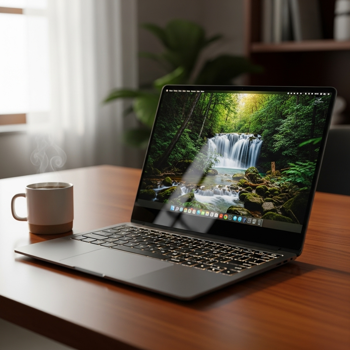

In [3]:
from vertexai.preview.vision_models import ImageGenerationModel
import vertexai

vertexai.init(project="formidable-feat-466408-r6", location="us-central1")

generation_model = ImageGenerationModel.from_pretrained("imagen-4.0-generate-preview-06-06")

images = generation_model.generate_images(
    prompt="Generate a laptop image",
    number_of_images=1,
    aspect_ratio="1:1",
    negative_prompt="",
    person_generation="allow_all",
    safety_filter_level="block_few",
    add_watermark=True,
)

display_image(images[0])

In [6]:
images

ImageGenerationResponse(images=[<vertexai.preview.vision_models.GeneratedImage object at 0x7f458995bb80>])

In [9]:
images[0]

In [15]:
images[0].save("sample_image.png")